## Sales Analysis using Pandas

#### A Project to analyse sales figures of electronic products of the states of USA and discover useful business insights from the data,finding answers to relevant questions and visualizations of the results.

In [237]:
# importing requirements
import numpy as np
import pandas as pd
import re
import os

#### Dataset obtained from https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis

##### Merging the monthly sales data of all the months for writing to a single csv file

In [238]:
import os
df=pd.read_csv("C:/Users/COMPUTER/Desktop/Pandas_Project/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
files=[file for file in os.listdir('C:/Users/COMPUTER/Desktop/Pandas_Project/SalesAnalysis/Sales_Data')]
year_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("C:/Users/COMPUTER/Desktop/Pandas_Project/SalesAnalysis/Sales_Data/"+file)
    year_data=pd.concat([year_data,df])
    

year_data.head()
year_data.to_csv("C:/Users/COMPUTER/Desktop/Pandas_Project/all_data.csv",index=False)
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Read in updated dataframe

In [240]:
all_data=pd.read_csv("C:/Users/COMPUTER/Desktop/Pandas_Project/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Adding additional columns

In [241]:
# adding month column
all_data['Month']=all_data['Order Date'].str[:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


### Cleaning the data

In [242]:
# Finding and clearing the NaN values first to clean the dataframe
Voidrows=all_data[all_data.isna().any(axis=1)]
Voidrows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping NaN rows

In [247]:
all_data.dropna(how='all',inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [248]:
## Checking if all NaN rows are deleted
Voidrows=all_data[all_data.isna().any(axis=1)]
Voidrows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [245]:
# So all NaN values are cleared
all_data['Month']=all_data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

##### An error: So now we have encountered an 'Or' which we need to find and delete from the dataframe

In [249]:
# temporary dataframe to find and store 'Or's
temp_data=all_data[all_data['Order Date'].str[:2]=='Or']
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


#### Cleaning 'Or's and resetting indices for the original dataframe

In [252]:
all_data=all_data[all_data['Order Date'].str[:2]!='Or']
all_data.reset_index(drop=True)
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


In [253]:
# Converting month column to Int32 datatype
all_data['Month']=all_data['Month'].astype('int32')
all_data.reset_index(drop=True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


### Question 1)  What month had the highest and lowest sales , and what were the sales numbers?

#### Converting appropriate columns to numeric type for calculation

In [255]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=all_data['Price Each'].astype('float32')
all_data.head()
# We can also use to_numeric function too!

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding a Sales column to get the total sales value by multiplying price and quantity ordered

In [256]:
all_data['Sales(in USD)']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD)
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


#### Getting monthly sales data grouped by months[1,12]


In [136]:
sales_results=all_data.groupby('Month').sum().round(3)
sales_results

,Quantity Ordered,Price Each,Sales(in USD)
Month,,,
1,10903,1811768.375,1822636.00
2,13449,2188884.750,2202497.00
3,17005,2791207.750,2807697.00
4,20558,3367671.000,3391403.00
5,18667,3135125.000,3153254.00
6,15253,2562025.500,2578352.25
7,16072,2632539.500,2648343.00
8,13448,2230345.500,2244943.00
9,13109,2084992.125,2098031.00


#### Plotting for a visual reresentation of sales in different months

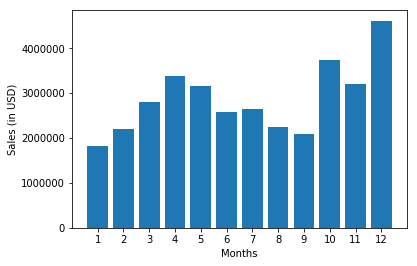

Highest Sales : 4613443.5 USD
Lowest Sales : 1822256.8 USD


In [135]:
import matplotlib.pyplot as plt
import math
#Plotting to see the sales data visually
months=range(1,13)
plt.bar(months,sales_results['Sales(in USD)'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales (in USD)")
plt.show()
print("Highest Sales :",sales_results['Sales(in USD)'].max().round(3),"USD")
print("Lowest Sales :",sales_results['Sales(in USD)'].min().round(3),"USD")

#### So, December had the highest sales and January had the lowest. December, being Christmas eve can explain the high volume of sales,followed by low sales in new year when people are more budget oriented after the festive season,probably waiting for their paycheck!!!

### Question 2)  What US city had the highest number of sales ?

In [257]:
# add a city column
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD)
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


#### Extracting city name using apply method for calculating citywise sales volume

In [87]:
# extracting city column using apply method
all_data['City']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Sales(in USD),City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,23.900000,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,99.989998,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,600.000000,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,11.990000,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,11.990000,Los Angeles


In [112]:
all_data.reset_index().head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City
0,0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas
1,2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston
2,3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles
3,4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles
4,5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles


In [259]:
#### grabbing State code from address,combining both City and State to avoid confusions
def get_State(str):
    return str.split(',')[2].split(' ')[1]
all_data['City']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1]+' '+ get_State(x))
all_data.head()
all_data.reset_index(drop=True).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
2,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
3,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
4,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


In [260]:
all_data['Sales(in USD)']=all_data['Sales(in USD)'].round(3)

In [261]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


#### Grouping cities by total sales

In [262]:
city_results=all_data.groupby('City').sum()
city_results

,Quantity Ordered,Price Each,Month,Sales(in USD)
City,,,,
Atlanta GA,16602,2779908.250,104794,2.795498e+06
Austin TX,11153,1809873.625,69829,1.819582e+06
Boston MA,22528,3637409.750,141112,3.661642e+06
Dallas TX,16730,2752627.750,104620,2.767976e+06
Los Angeles CA,33289,5421435.000,208325,5.452571e+06
New York City NY,27932,4635371.000,175741,4.664318e+06
Portland ME,2750,447189.250,17144,4.497583e+05
Portland OR,11303,1860558.250,70621,1.870732e+06
San Francisco CA,50239,8211461.500,315520,8.262204e+06


#### Plotting sales vs City

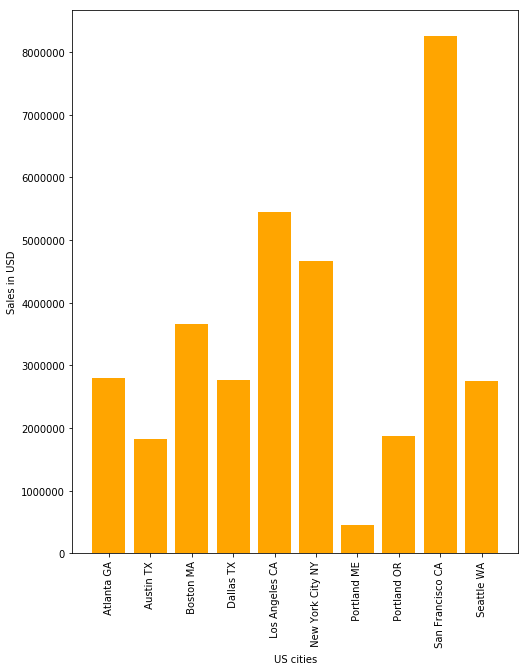

In [263]:
import matplotlib.pyplot as plt
cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,city_results['Sales(in USD)'],color='orange')
plt.xticks(cities,rotation='vertical')
plt.xlabel("US cities")
plt.ylabel("Sales in USD")
plt.show()

#### It is clear that the city of San Francisco CA had the highest sales of the year with Portland ME being the lowest. San Francisco, being a large producer of electronics for the Silicon Valley explains the high volume of electronic sales in 2019.

### Question 3) What time should the business display ads for maximising the likelihood of customers buying products?

##### First converting OrderDate string to a date_time format

In [264]:
all_data.reset_index(drop=True).head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
2,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
3,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
4,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


#### Converting order date to date_time format inbuilt  

In [265]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [266]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


In [267]:
# Extracting minute and hours and adding them as new columns
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data['Count']=1
all_data=all_data.reset_index(drop=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX,8,46,1
1,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA,22,30,1
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38,1
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38,1
4,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,9,27,1


#### Plotting sales vs time of order time to find correlations, by adding up all the sales value based on the orders placed for a specific hour of the day

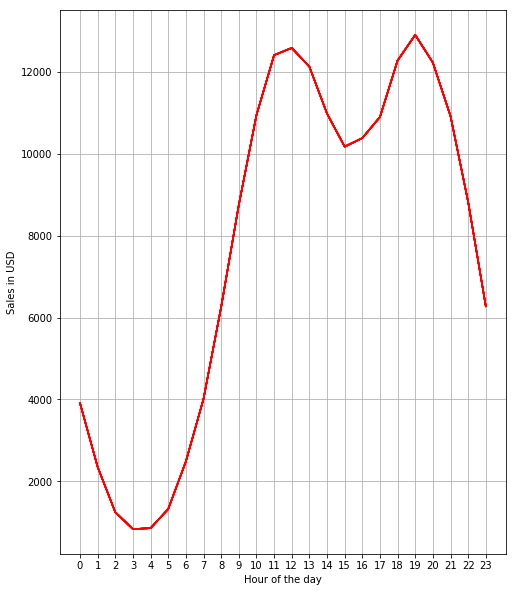

In [270]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count(),color='red')
plt.xticks(hours)
plt.grid()
plt.xlabel("Hour of the day")
plt.ylabel("Sales in USD")
plt.show()

##### Here in this graph we can clearly see the peaks at 11AM -12 PM and 6PM-7PM.So targetting ads a few minutes before the peak times may lead to more likelihood for customers placing order at an average. We can see a decline in orders after 10 PM ,also a plateau from 2 AM to 5 AM where most people are asleep, it simply means the graph is reliable and we can make predictions off it .

#### Recommendation : Show ads just before 7 PM and during 11 AM to 12 PM

### Question 4)  What products are often sold together?

#### Finding orders placed together by grouping data by order ID duplicates

In [271]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City,Hour,Minute,Count
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38,1
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38,1
17,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,19,42,1
18,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los Angeles CA,19,42,1
29,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31,1


In [272]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head(10)

C:\Users\COMPUTER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales(in USD),City,Hour,Minute,Count,Grouped
2,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.990000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.980000,San Francisco CA,17,0,1,"AAA Batteries (4-pack),Google Phone"
32,176586,Google Phone,1,600.000000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.000000,San Francisco CA,17,0,1,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.950000,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.950000,New York City NY,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"
119,176672,USB-C Charging Cable,1,11.950000,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.950000,New York City NY,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


#### Here, after grouping and joining the products(a market basket analysis on a single dataset), we can see which products are bought together. We can use this data to create recommendation systems using CF or CBF(ML filtering algorithms)

In [273]:
df=df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


#### Using itertools and collections to find the number of times some specific items are bought together for the entire year from the entire sales data

In [278]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    # considering pairs of items purchased.
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,"     Number of times -->",value)

('iPhone', 'Lightning Charging Cable')      Number of times --> 1005
('Google Phone', 'USB-C Charging Cable')      Number of times --> 987
('iPhone', 'Wired Headphones')      Number of times --> 447
('Google Phone', 'Wired Headphones')      Number of times --> 414
('Vareebadd Phone', 'USB-C Charging Cable')      Number of times --> 361
('iPhone', 'Apple Airpods Headphones')      Number of times --> 360
('Google Phone', 'Bose SoundSport Headphones')      Number of times --> 220
('USB-C Charging Cable', 'Wired Headphones')      Number of times --> 160
('Vareebadd Phone', 'Wired Headphones')      Number of times --> 143
('Lightning Charging Cable', 'Wired Headphones')      Number of times --> 92


#### We can clearly see that iPhone and  Google Phone with their standard chargers were the most popular items, and are sold together, alongwith wired headphones following up.

### Question 5)  What product is sold the most and why?

#### Grouping by products and their sales volume to find which product is sold the most.

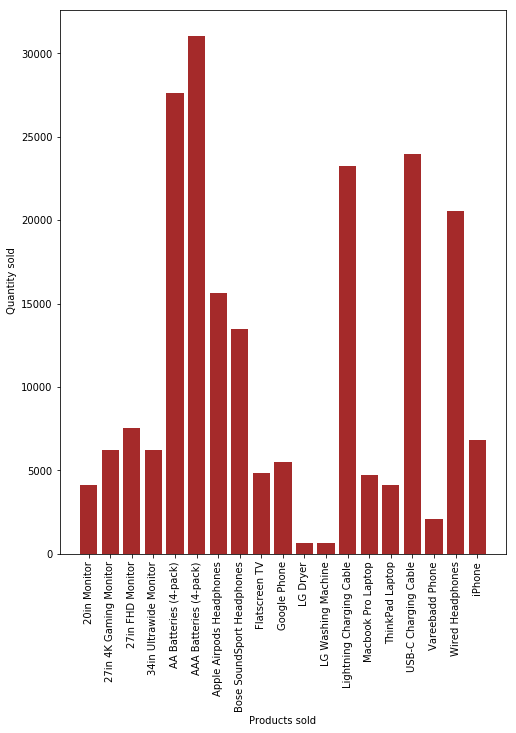

In [274]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product,df in product_group]
plt.bar(products,quantity_ordered,color='brown')
plt.xticks(products,rotation='vertical')
plt.xlabel("Products sold")
plt.ylabel(" Quantity sold")
plt.show()


#### From the bar plot , we can clearly see that AAA batteries followed by AA batteries are the most sold items, and LG's Dryer and Washing machine are the least sold. But, to be noted that big appliances have long term use and are not bought often. Other popular buys are charging cables and headphones.

##### Trying to find a correlation between products sold and its sales volume and its prices.

In [279]:
prices=all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

#### Plotting dual plots to see correlations between price and sales for each of the popular products.

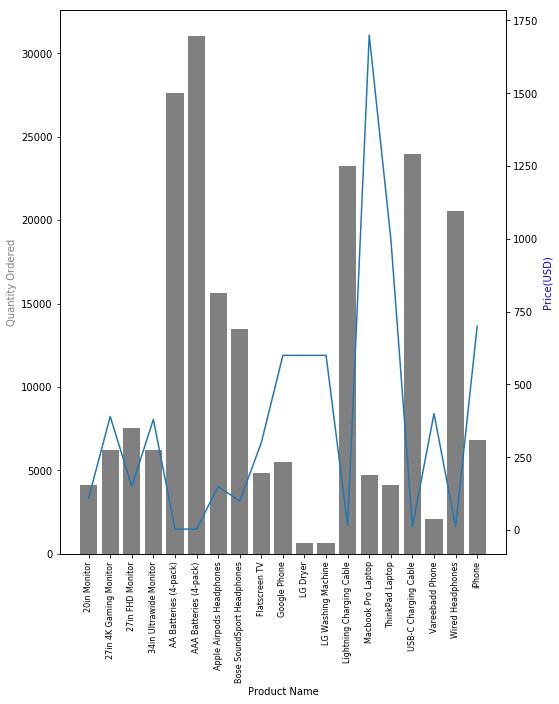

In [280]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='grey')
ax2.plot(products,prices)
ax1.set_xticklabels(products,rotation='vertical',size=8)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='grey')
ax2.set_ylabel('Price(USD)', color='b')
plt.show()

#### From the price vs quantity sold for various products, we can see that cheap products were sold more and costly ones were sold less. It gives a clear correlation between prices and popularity of the product. We can also see that compared to LG appliances which were costly and are bought in less numbers, Macbook Pro Laptop and ThinkPad Laptop were popular and their sales are respectable in contrast to their high prices.Similar trend can be observed for iPhones too. So, these were popular products especially among the student community which have considerable population !!

## Abhishek 